In [54]:
''' 
    Reference:
    "A first encounter with the Hartree-Fock self-consistent-field method"
    Am. J. Phys. 2021, 89, 426.
'''

import numpy as np 
import matplotlib.pyplot as plt
# In a Jupyter notebook, it enables inline figures 
%matplotlib inline  

In [59]:
# Atomic number
# i.e. the number of protons in the nucleus of an atom
Z = 2

# Number of SCF itrations
num_iter = 20

# Parameters from Table 1.
eps_1 = -Z ** 2/2
eps_2 = -Z ** 2/8
I_1111 = 5/8 * Z
I_1112 = 2**12*np.sqrt(2)/27/7**4 * Z
I_1122 = 16/9**3 * Z
I_1212 = 17/3**4 * Z
I_1222 = 2**9*np.sqrt(2)/27/5**5 * Z
I_2222 = 77/2**9 * Z

# Open three files, one for the theta values calculated in each iteration, one for the two-electron (“total”) energy, and# one for the associated orbital energy:
PATH='../aux/'
f_theta = open(PATH + 'theta.dat', 'w')
f_total_energy = open(PATH + 'total_energy.dat', 'w')
f_orbital_energy = open(PATH + 'orbital_energy.dat', 'w')

KeyboardInterrupt: 

In [56]:
%%latex
$$
\begin{align}
& \text{Expectation value for neutral Helium atom; }He^4_2: \\

& \langle \Psi | \hat{H} | \Psi \rangle = 
    2 \langle \psi | \hat{h} | \psi \rangle 
    + \langle \psi \psi  | \hat{V}_{12} | \psi \psi\rangle \\
\\
& \text{Hartree-Fock energy:} \\

& E^{HF} = min_{\Psi} \langle \Psi | \hat{H} | \Psi \rangle
\end{align}
$$

<IPython.core.display.Latex object>

In [57]:
# Initialization of the HF SCF procedure:
theta = 0
f_theta.write("{} {}\n".format(0, theta))

f_theta_list = []
f_total_energy_list = []
f_orbital_energy_list = []
f_theta_list.append([theta, theta])

# Loop for carrying out the iterative SCF procedure:
for i in range(num_iter):
    c_1 = np.cos(theta) # Eq.(16)
    c_2 = np.sin(theta) # Eq.(17)

    # Calculation of the two-electron energy [Eq.(13)]:
    total_energy = 2*(eps_1*c_1**2 + eps_2*c_2**2)  
    + I_1111*c_1**4 + 4*I_1112*c_1**3*c_2 
    + 2*(2*I_1122 + I_1212)*c_1**2*c_2**2
    + 4*I_1222*c_1*c_2**3 + I_2222*c_2**4
    f_total_energy.write("{} {}\n".format(i, total_energy))
    f_total_energy_list.append([i,total_energy])

    # Calculation of the elements of the Fock matrix:
    # Eq.(23)  
    F_11 = eps_1 + I_1111*c_1**2
    + 2*I_1112*c_1*c_2 + I_1212*c_2**2 
    # Eq.(24)
    F_12 = I_1112*c_1**2 + 2*I_1122*c_1*c_2
    + I_1222*c_2**2 
    # Eq.(25)
    F_21 = F_12 
    # Eq.(26)
    F_22 = eps_2 + I_1212*c_1**2
    + 2*I_1222*c_1*c_2 + I_2222*c_2**2

    # Calculation of the lower of the two roots of the characteristic
    # polynomial of the Fock matrix, using the quadratic formula:
    orbital_energy = 0.5*(F_11 + F_22) 
    - np.sqrt(0.25*(F_11 - F_22)**2 + F_12*F_21)
    f_orbital_energy.write("{} {}\n".format(i+1, orbital_energy))
    f_orbital_energy_list.append([i+1, orbital_energy])

    # For a given Fock matrix and orbital energy, Eq.(22)corresponds
    # to a simple linear system for c_1 and c_2. By analytically solving
    # this system, an explicit expression for the polar angle theta is
    # obtained. This expression is used in the following for updating
    # theta:
    theta = np.arctan ((orbital_energy - F_11)/F_12)
    f_theta.write("{} {}\n".format(i+1, theta))
    f_theta_list.append([theta, theta])

# Change variable datatype in order to plot figures
f_theta_list = np.array(f_theta_list)
f_total_energy_list = np.array(f_total_energy_list)
f_orbital_energy_list = np.array(f_orbital_energy_list)

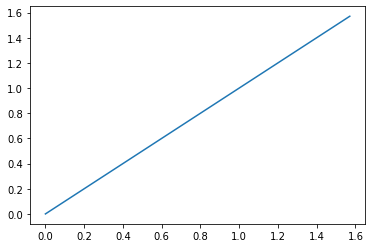

In [58]:
# Plot result
fig, ax = plt.subplots()
ax.plot(f_theta_list[:,0],f_theta_list[:,1])
# f_theta.close()
# f_total_energy.close()
# f_orbital_energy.close()